# Week-1 Assignment

# **Gotta catch 'em all !**

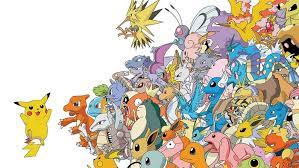

**Welcome to your first graded assignment! Hope that you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We have got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### 2) Read the csv file and assign it to a variable .

In [2]:
df = pd.read_csv('W1_Pokemon.csv')


### 3) Display shape of dataframe
Expected Output - (800, 13)

In [3]:
df.shape


(800, 13)

### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [4]:
df.columns


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### 5) Remove the column '#' and update the dataframe.

In [5]:
df.drop('#',axis=1,inplace=True)
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### 6) Set the 'Name' column as the index of dataframe

In [6]:
df.set_index('Name', inplace=True)

###  7) Print a list of all the unique Type-1 powers

In [7]:
print(df['Type 1'].unique())


['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


8) Create a column which contains the Type 1 and Type 2 abilities of pokemons, seperated with a '+'' sign. Also, display the no. of pokemons that have type-1 power as 'Psychic' and type 2 power as 'Flying' using this new column/

In [8]:
df['powers'] = df['Type 1']+"+"+df['Type 2'].fillna('None')
c = df.loc[df['powers']=='Psychic+Flying'].shape[0]
print(c)

6


## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. How many pokemons have 'Mega' in their name?

In [9]:
mega = df[df.index.str.contains('Mega')].shape[0]
print(mega)


49


### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [10]:
print(df['Sp. Def'].std())


27.82891579711746


### 3. What percentage (upto 3 decimal places) of pokemons are legendary ?

In [11]:
leg = df[df['Legendary']==True].shape[0]
print(leg/8)


8.125


### 4. Name the pokemon(s) with Maximum Defense.

In [12]:
max_defence = df['Defense'].max()
count = df[df['Defense']==max_defence].index.tolist()
print(count)


['SteelixMega Steelix', 'Shuckle', 'AggronMega Aggron']


### 5. Which poison pokemon has the strongest attack ?

In [13]:
poison = df[df['Type 2']=='Poison']
max_attack = poison['Attack'].max()
print(poison[poison['Attack']==max_attack].index.tolist())


['BeedrillMega Beedrill']


### 6. Using seaborn make different types of plots, observe the trend and answer the questions given in the form.

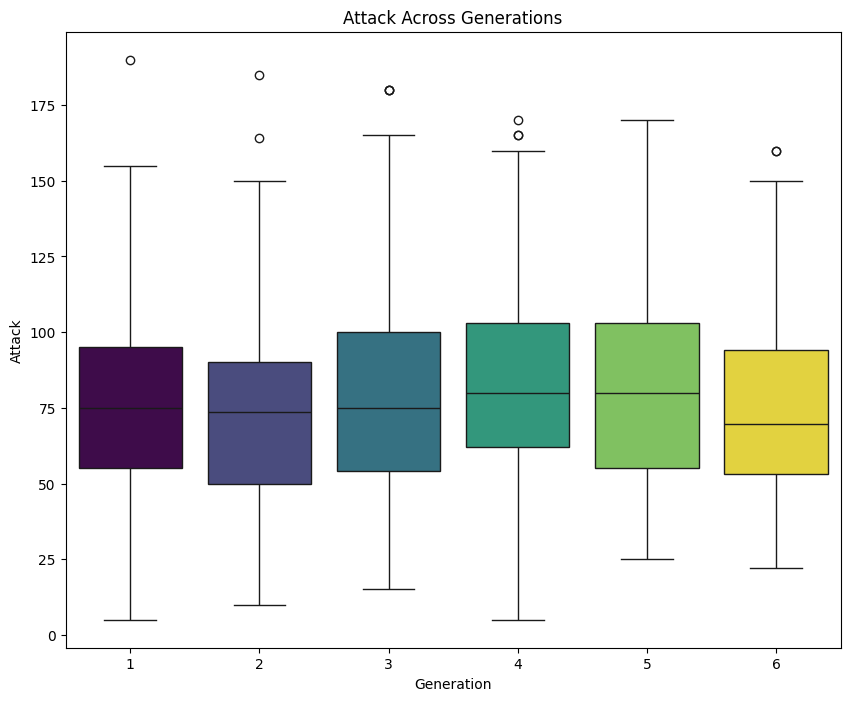

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Generation' , y='Attack' , data=df,palette="viridis",hue='Generation',legend=False)
plt.title('Attack Across Generations')
plt.show()


**INSIGHTS**
Each Generation has several outliers with very high attack value
The median of Each Generation is approximately same

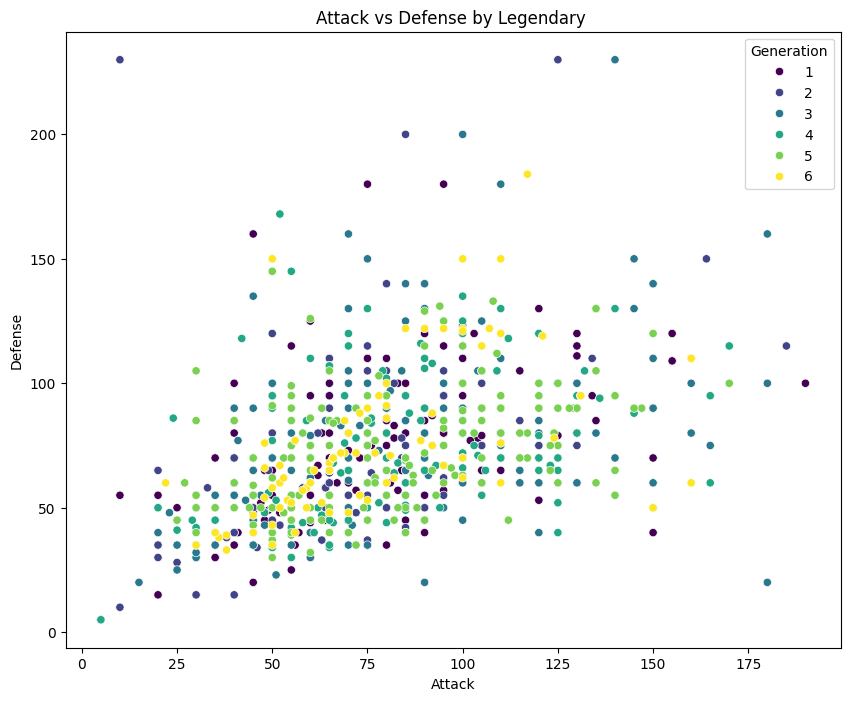

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Attack', y='Defense', hue='Generation', palette='viridis')
plt.title('Attack vs Defense by Legendary ')
plt.show()

**INSIGHTS**
A very few pokemons have extremely high attack and defence in each generation .
As the Generation increases the pokemons are more concentrated towards the center.

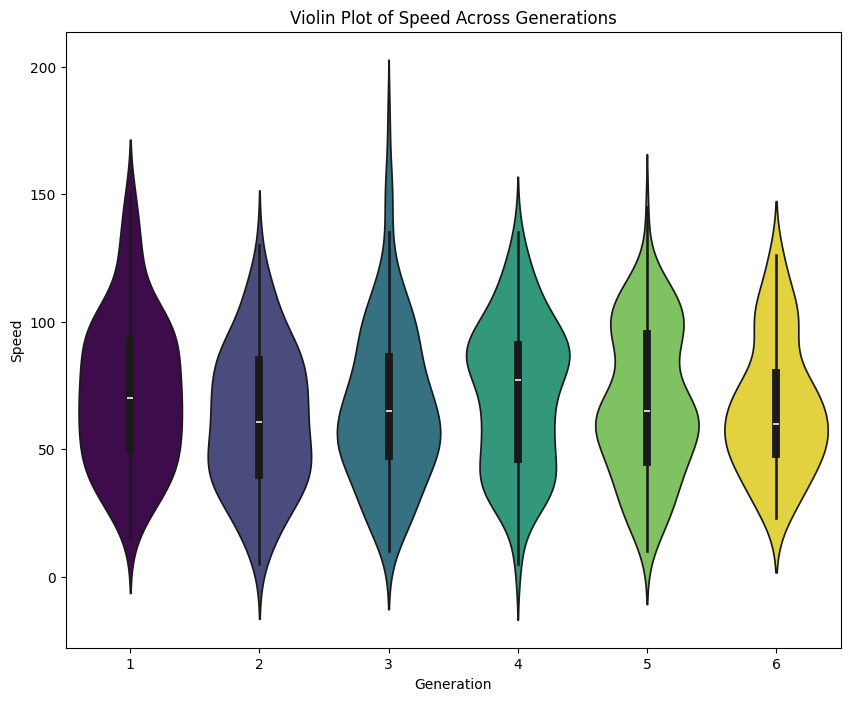

In [35]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Generation', y='Speed', data=df, palette="viridis", hue='Generation', legend=False)
plt.title('Violin Plot of Speed Across Generations')
plt.xlabel('Generation')
plt.ylabel('Speed')
plt.show()

**INSIGHTS**
Most density of the pokemons is lying between the speed of 50-100 irrespective of the Generation

### 7. Which is the second fastest non-legendary 'Ghost' type pokemon from 4th generation ?

In [17]:
fast_ghost_non_leg = df[(df['Generation']==4) & (df['Legendary']==False) & (df['Type 1']=='Ghost')].sort_values(by='Speed',ascending=False)
print(fast_ghost_non_leg.iloc[1].name)


Drifblim


### 8. How many non-legendary pokemons have stronger defence but weaker attack than Charizard?

In [18]:
attack = df.loc['Charizard','Attack']
defense = df.loc['Charizard' , 'Defense']
required = df[(df['Legendary']==False)&(df['Defense']>defense)&(df['Attack']<attack)]
print(required.shape[0])


116



## ***Bonus Questions***
## Here are some bonus questions that you can try further !

### These questions are UNGRADED, and are given as an extra exercise.

### Which pokemon has the highest combined value of Attack and Sp. Atk ?

In [19]:
#your code here
df['total']=df['Attack']+df['Sp. Atk']
max_value= df['total'].max()
print(df[df['total']==max_value].index.tolist())

['RayquazaMega Rayquaza', 'DeoxysAttack Forme']


### Which type of legendary pokemons are the most common?

In [20]:
leg_types = df[df['Legendary']==True]['Type 1'].value_counts()
print(leg_types.idxmax())


Psychic


### How many generation-3, non-legendary pokemons have higher HP than the weakest generation-6, legendary pokemon?

In [21]:
gen6_leg_minhp = df[(df['Legendary']==True)&(df['Generation']==6)]['HP'].min()
gen3_non_leg_hp = df[(df['Legendary']==False)&(df['Generation']==3)&(df['HP']>gen6_leg_minhp)].shape[0]
print(gen3_non_leg_hp)


95


### Print out the third slowest pokemon(s) in the dataset.

In [22]:
print(df.sort_values(by='Speed' , ascending=True).iloc[2].name)


Trapinch


### Which pokemon type has the highest average HP?

In [23]:
avg_hp_by_type = df.groupby('Type 1')['HP'].mean()
print(avg_hp_by_type.idxmax())


Dragon
